# The evaluation of PUFEM basis functions

The major difference of PUFEM and FEM are the approximation spaces used, i.e. the finite element basis functions are different from the PUFEM basis functions.
The FEM approximation space (with Lagrange Interpolation) is given by
$$ V^{\text{FEM}}_h = \left\{\sum^{\text{ndof}}_{i=1} c_i \varphi_i : \varphi_i \in H^k(\Omega)  \right\}.$$

For partition of unity finite element method (PUFEM) the approximation space is given by
$$V^{\text{PUFEM}}=\sum\limits^N_{i=1} \varphi_i \cdot V_i  = \left\{\sum\limits^N_{i=1} \varphi_i \cdot v_i : v_i \in V_i \right\}.$$
$\varphi_i$ are partition of unity functions subordinate to patches that form a cover of the domain.  
$V_i$ are local approximation spaces on the patches.  
$N$ denotes the number of patches.

In the discrete setting with the use of the Galerkin method we obtain
$$V^{\text{PUFEM}}_h = \left\{\sum\limits^N_{i=1} \varphi_i \cdot \sum\limits_{j=1}^{M} c_j \psi_j : \psi_j \in V_i\right\},$$

where $\psi_j$ are basis functions of $V_i$ and $c_j$ are scalar unknowns.  
M denotes the number of degrees of freedom in the patch.

## Example: Plane waves

Plane wave functions are used for the approximation of the solution of the Helmholtz equation (see: Helmholtz.ipynb). 

Here we are using a mesh based partition of unity (P1 FEM) functions, which are evaluated on the reference triangle. 

source module for methodsNM imported.


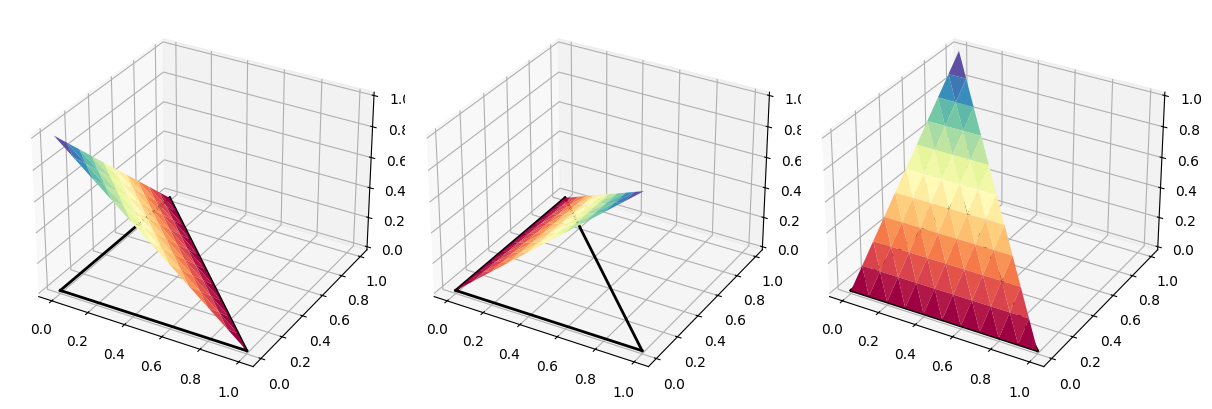

In [1]:
from import_hack import *
from methodsnm.visualize import *
from methodsnm.fe_2d import P1_Triangle_FE
import numpy as np
p1 = P1_Triangle_FE()
DrawTriangleFE(p1,figsize=(12,5))

By mapping it we then get a hat function (as known from FEM).

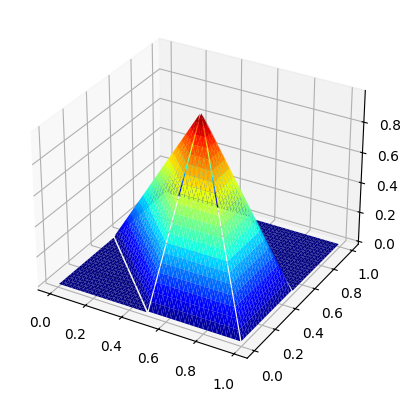

In [2]:
from methodsnm.fes import P1_Triangle_Space
from methodsnm.meshfct import FEFunction
m = StructuredRectangleMesh(2, 2)
fes_basis = P1_Triangle_Space(m)
uh = FEFunction(fes_basis)
uh.vector[:] = 0
uh.vector[4] = 1
DrawFunction2D(uh, sampling=20, shrink_eps=0.025, figsize=(5,4), contour=False)

The local approximation basis however lives in a local patch. Here, $\psi_j$ are global plane wave functions, i.e. functions of the form
$$ \psi_j = \mathrm{e}^{ik(x\cos(\theta_l))(y\sin(\theta_l))},$$ 

where $l={1,\dots,M}$ denotes the ndofs of one patch and $\theta_l= \frac{2\pi l}{M}$.  
  
The value of $\theta_l$ determines the direction of the plane wave. Solutions of the Helmholtz equation can be locally (in the Patch) evaluated up to order $p$ with  $2p+1$ plane wave functions. The variable $k$ is called the wave number. The value of the wave number determines the wavelength.
Since we are only interested in the real solutions we use the real part of $\psi_j$.

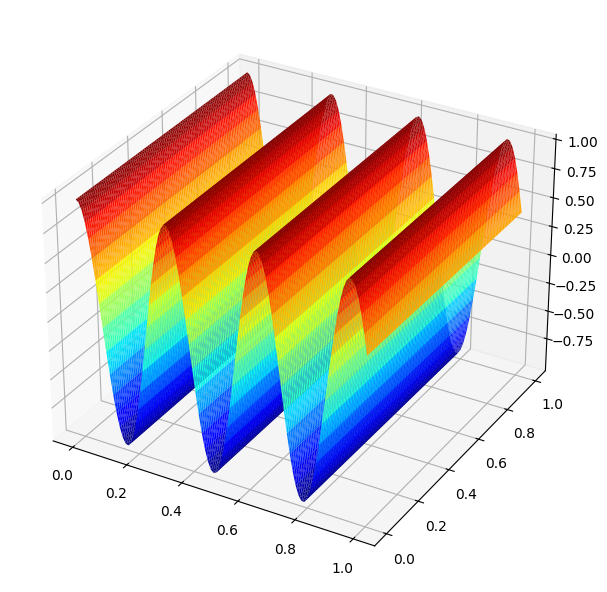

In [3]:
from numpy import exp,cos,sin,real,pi
wavenumber_ = 20
mesh = StructuredRectangleMesh(10,10)
theta_ = 2 *pi
global_planewave =  GlobalFunction(lambda x: real(exp(1j*wavenumber_*((x[0])*cos(theta_)+(x[1])*sin(theta_)))), mesh = mesh)
DrawFunction2D(global_planewave, contour=False)

The PUFEM basis function we obtain by multiplication of all the partition of unity with all the local approximation functions.  
$$ b_l(x) = \varphi_i (x) \psi_j(x) = \hat{\varphi}_i (\hat{x}) \psi_j(x) $$  
 for $l=1,\dots,N\cdot M; \ i=1,\dots,N; \ j=1,\dots,M.$

In the computation we use the Transformation $\Phi \colon \hat{T} \to T $ from the reference element to a local element in the mesh
$$b_l(x) = \hat{\varphi}_i (\hat{x}) \cdot \psi_j(\hat{x} \circ \Phi).$$

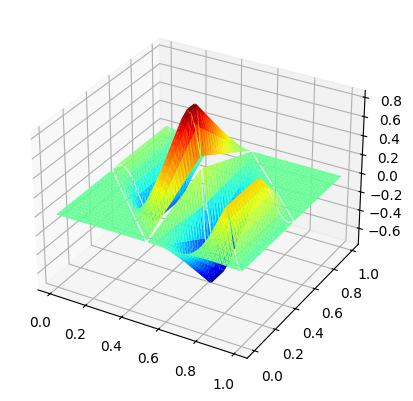

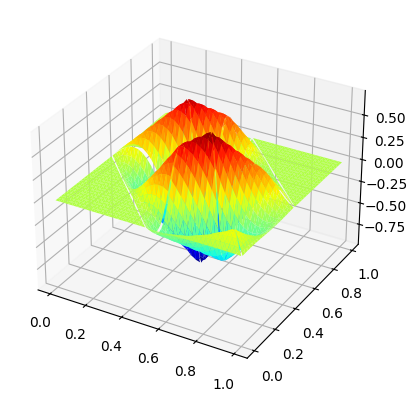

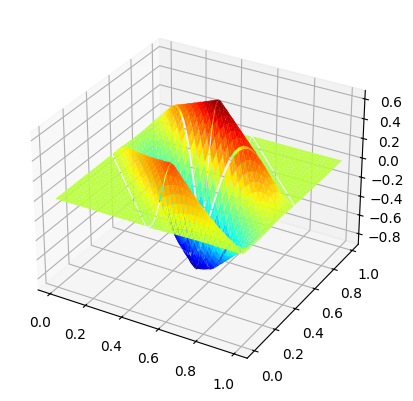

In [4]:
from methodsnm.fes import PUFE_Space
m = StructuredRectangleMesh(2, 2)
order = 1
wavenumber = 15
fes_basis = PUFE_Space(m,order= order, wavenumber=wavenumber)
uh = FEFunction(fes_basis)
for i in range(4*(2*order+1),5*(2*order+1)):
    uh.vector[:] = 0
    uh.vector[i] = 1
    DrawFunction2D(uh, sampling=20, shrink_eps=0.025, figsize=(5,4), contour=False)

Often (e.g. basis harmonic polynomials) we need to center the local approximation functions around a point inside the patch (e.g. for the harmonic polynomials used to solve the Laplace equation)
$$\psi_j(x-x_i) \quad \text{for} \ x_i\in\Omega_i.$$
This is not the case for the basis consisting of plane wave functions.

We are also interested in the derivative of the PUFEM basis, which get via the product rule
$$\nabla b_l(x) =  \nabla \varphi_i(x) \cdot \psi_j (x) + \nabla \psi_j (x) \cdot \varphi_i(x) = (D\Phi(\hat{x}))^{-T} \nabla \hat{\varphi}_i (\hat{x})\cdot \psi_j (x) + \nabla \psi_j (x) \cdot \hat{\varphi}_i(\hat{x}) . $$

 Due to the use of the transformation rule, we can here also use the evaluation of the derivative of the P1 hat functions on reference element.
